# Gradient Descent Example

**Source (all credits to):** [Artur Vaz](https://medium.com/data-hackers/gradientes-descendentes-na-pr%C3%A1tica-melhor-jeito-de-entender-740ef4ff6c43)

# 1. Import Libraries

In [32]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 2. Prepare Data

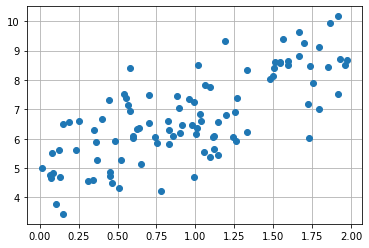

In [33]:
# prepare the data
X = 2 * np.random.rand(100,1)
y = 5 +2 * X+np.random.randn(100,1)

# Visualize the data
plt.plot(X, y, 'o')
plt.grid()
plt.show()

# 3. Calc Gradient Descent

In [45]:
theta, cost_history, theta_history = gradient_descent_v1(X, y, 0)
print(theta)
print('---')
print(cost_history)
print('---')
print(theta_history)

[[0.6656896]]
---
[232573.0218681  227781.02528292 223104.73852008 218541.36759533
 214088.18598929 209742.53301842 205501.81224527 201363.48992725
 197325.09350268 193384.21011355]
---
[[0.07028923 0.07028923]
 [0.13972466 0.13972466]
 [0.20831665 0.20831665]
 [0.27607546 0.27607546]
 [0.3430112  0.3430112 ]
 [0.40913387 0.40913387]
 [0.47445335 0.47445335]
 [0.53897939 0.53897939]
 [0.60272164 0.60272164]
 [0.6656896  0.6656896 ]]


# 4. Calc Stochastic Gradient Descent

In [67]:
theta, cost_history, theta_history0, theta_history1 = stocashtic_gradient_descent(X, y, 1)
print(theta)
print('---')
print(cost_history)
print('---')
print(theta_history0)
print('---')
print(theta_history1)

IndexError: index 1 is out of bounds for axis 0 with size 1

# 5. Calc Mini Batch Gradient Descent

In [66]:
theta, cost_history, theta_history0, theta_history1 = minibatch_gradient_descent(X, y, 1)
print(theta)
print('---')
print(cost_history)
print('---')
print(theta_history0)
print('---')
print(theta_history1)

[[1.43569001 1.43592618]
 [1.4396686  1.4393189 ]]
---
[470.36067672 452.58575516 435.56453946 419.24504073 403.5668935
 388.51935141 374.07888765 360.23075167 346.95805637 334.2054001 ]
---
[1.04912326 1.09553191 1.14103347 1.18564445 1.22939028 1.27228328
 1.31434866 1.35559165 1.39603152 1.43569001]
---
[1.05028809 1.09739444 1.14351009 1.18860744 1.23276001 1.27594507
 1.31820956 1.35958165 1.400058   1.4396686 ]


# 6. Functions Used

In [35]:
def  cal_cost(theta,X,y):
  
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [36]:
def gradient_descent_v1(X,y,theta,learning_rate=0.01,iterations=10):

    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        #multiplicacao matricial resultando em um único output 2:n m:2
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
    
    return theta, cost_history, theta_history

In [65]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history0 = np.zeros(iterations)
    theta_history1 = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)/m
        cost_history[it]  = cost
        theta_history0[it] = theta[0][0]
        theta_history1[it] = theta[1][0]
        
    return theta, cost_history, theta_history0, theta_history1

In [62]:
def minibatch_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10,batch_size =20):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history0 = np.zeros(iterations)
    theta_history1 = np.zeros(iterations)

    n_batches = int(m/batch_size)
    
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            X_i = np.c_[np.ones(len(X_i)),X_i]
           
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)/m
        cost_history[it]  = cost
        theta_history0[it] = theta[0][0]
        theta_history1[it] = theta[1][0]
        
    return theta, cost_history,theta_history0,theta_history1